In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

<a name='_toc'></a>
# Table of contents

* [Task 1 (1)](#task1)
* [Task 2 (1)](#task2)
* [Task 3 (2)](#task3)
* [Task 4 (2)](#task4)
* [Task 5 (2)](#task5)
* [Task 6 (2)](#task6)
* [Task 7 (4)](#task7)
* [Task 8 (3)](#task8)
* [Task 9 (2+1)](#task9)
* [Task 10 (3)](#task10)
* [Task 11 (4)](#task11)
* [Task 12 (4)](#task12)

<a name='task1'></a>
## Task 1 (1)<sup>[toc](#_toc)</sup>

Пусть дана обучающая выборка $\{(\boldsymbol{X}, \boldsymbol{y}) \colon \boldsymbol{X} \in \mathbb{R}^{n \times d}, \boldsymbol{y} \in \mathbb{R}^{n} \}$, $n \ge d$. Предположим, что справедлива следующая модель линейной регрессии:
$$
y = \boldsymbol{x}^T\boldsymbol{w} + \epsilon, \quad \epsilon \sim Normal(0, \sigma^2),
$$
где $\boldsymbol{w}$ --- истинный, но неизвестный нам вектор весов. Пусть $\hat{\boldsymbol{w}}$ --- MLE-оценка вектора весов $\boldsymbol{w}$.

Предположим, к нам поступили тестовые данные $\boldsymbol{X}^* \in \mathbb{R}^{m \times d}$, для которых с помощью оценки $\hat{\boldsymbol{w}}$ предсказываем вектор $\boldsymbol{y}^*\in \mathbb{R}^{m}$.
Найдите математическое ожидание и матрицу ковариаций для вектора $\boldsymbol{y}^*$ (при условии фиксированной матрицы дизайна $\boldsymbol{X}$).

$
\hat w = (X^T X)^{-1} X^T y
$

$ E[y^*] 
= E[X^* \hat w]
= E[X^* (X^T X)^{-1} X^T y] = \\
= X^* (X^T X)^{-1} X^T E[y] = \\
= X^* (X^T X)^{-1} X^T E[X w + \epsilon] = \\
= X^* (X^T X)^{-1} X^T X w = \\
= X^* w
$

$ E[ y^* y^{*T} ]
= E[ X^* (X^T X)^{-1} X^T y \; y^T X(X^T X)^{-1} X^{*T}]
= X^* w w^T X^{*T} + \sigma^2 X^*(X^T X)^{-1} X^{*T} 
$

$ cov(y^*, y^*)
= E[ y^* y^{*T} ] - E[ y^* ] E[ y^{*T} ]
= X^* w w^T X^{*T} + \sigma^2 X^*(X^T X)^{-1} X^{*T} - X^* w w^T X^{*T} = \\
= \sigma^2 X^*(X^T X)^{-1} X^{*T}
$

<a name='task2'></a>
## Task 2 (1)<sup>[toc](#_toc)</sup>

Пусть дана выборка $(\boldsymbol{X},\boldsymbol{t}) = \{(\boldsymbol{x}_i, t_i)\colon \boldsymbol{x}_i \in \mathbb{R}^d, t_i \in \mathbb{R}\}_{i = 1}^n$, ($\boldsymbol{X} \in \mathbb{R}^{n \times d}$, $\boldsymbol{t} \in \mathbb{R}^n$, $n \ge d$). Предположим справедливость следующей модели данных
$$
t = \boldsymbol{x}^T\boldsymbol{w} + \epsilon(\boldsymbol{x}),
$$
где $\epsilon(\boldsymbol{x}) \sim Normal(0, \sigma(\boldsymbol{x})^2)$. Найдите MLE-оценку на вектор весов $\boldsymbol{w}$ в данном случае.

$ L = \prod\limits_{i=1}^n 
\frac 1 {\sqrt{2\pi \sigma^2 X_i}} 
\; \cdot \;
e^{-\frac 1 2 \sum\limits_{i-1}^n \frac {(t_i - X_i^T w)^2} {\sigma^2(X_i)}}
\to \max
$

$ \sum\limits_{i-1}^n \frac {(t_i - X_i^T w)^2} {\sigma^2(X_i)} \to \min $

Пусть  
$ Y_i = \frac {X_i} {\sigma(X_i)}, \ u_i = \frac {t_i}{\sigma(X_i)}$  
$ 
X = \begin{pmatrix}
  \quad X_1 \quad \\
  \quad \vdots \quad \\
  \quad X_n \quad
\end{pmatrix}, \quad
t = \begin{pmatrix}
  t_1 \\
  \vdots \\
  t_n
\end{pmatrix}
$

Тогда  
$ Y = diag(\frac 1 {\sigma(X_1)}, ... , \frac 1 {\sigma(X_n)}) \cdot X $  
$ u = diag(\frac 1 {\sigma(X_1)}, ... , \frac 1 {\sigma(X_n)}) \cdot t $

$ \sum\limits_{i-1}^n \frac {(t_i - X_i^T w)^2} {\sigma^2(X_i)}
= \sum\limits_{i-1}^n (u_i - Y_i^T w)^2
= || u - Y w ||_2^2 \to \min
$

$ \hat w = (Y^T Y)^{-1} Y^T u $

$ \hat w = (X^T D^2 X)^{-1} X^T D^2 t $,  
где $ D^2 = diag(\frac 1 {\sigma(X_1)^2}, ... , \frac 1 {\sigma(X_n)^2}) $

<a name='task3'></a>
## Task 3 (2)<sup>[toc](#_toc)</sup>

Пусть дана выборка $(\boldsymbol{x}, \boldsymbol{y}) = \{(x_i,y_i)\colon x_i, y_i \in \mathbb{R}\}_{i=1}^n$. Пусть данные соответствуют модели
\begin{gather*}
	y_i = \beta x_i + \epsilon_i,
\end{gather*}
где $\epsilon_i \sim Normal(0, \sigma^2)$. При этом значения $\boldsymbol{x}$ наблюдаются с ошибкой, т.е. представлена не выборка $(\boldsymbol{x}, \boldsymbol{y})$, а выборка $(\boldsymbol{z}, \boldsymbol{y}) = \{(z_i, y_i)\colon z_i, y_i \in \mathbb{R}\}_{i = 1}^n$, где $z_i = x_i + \delta_i$, $\delta_i \sim Normal(0, \tau^2)$. Шумы $\epsilon_i$ и $\delta_i$ независимы. Оценим величину $\beta$, используя стандартный метод наименьших квадратов согласно формуле
\begin{gather*}
	\hat\beta = \frac{\sum_{i=1}^n z_i y_i}{\sum_{i=1}^n z_i^2}.
\end{gather*}
Докажите, что оценка $\hat\beta$ не является состоятельной. Для этого покажите, что $\hat\beta \xrightarrow[]{P} a\beta$ при $n \to \infty$. Найдите явное выражение для $a$ в предположении, что точки $\{x_i\}_{i=1}^n$ поступают из некоторого распределения $F(x)$ с конечными первыми и вторыми моментами $E(X)$ и $E(X^2)$. 

$ \hat \beta = \frac
{ \sum\limits_{i=1}^n z_i y_i}
{ \sum\limits_{i=1}^n z_i^2}
= \frac 
{\sum\limits_{i=1}^n (x_i + \delta_i)(\beta x_i + \epsilon_i)} 
{\sum\limits_{i=1}^n (x_i + \delta_i)^2}
= \frac
{
    \beta \frac 1 n \sum\limits_{i=1}^n x_i^2 \ + \
    \frac 1 n \sum\limits_{i=1}^n x_i \epsilon_i \ + \
    \beta \frac 1 n \sum\limits_{i=1}^n x_i \delta_i \ + \
    \frac 1 n \sum\limits_{i=1}^n \delta_i \epsilon_i
}
{
    \frac 1 n \sum\limits_{i=1}^n x_i^2 \ + \
    \frac 1 n \sum\limits_{i=1}^n \delta_i^2 \ + \
    \frac 2 n \sum\limits_{i=1}^n x_i \delta_i
}
$

По закону больших чисел 
$ \frac 1 n \sum\limits_{i=1}^n x_i^2 \xrightarrow[]{P} E[x^2]
$

Шумы независимы, поэтому т.к.  
$ E[x_i \epsilon_i] = E[x_i] E[\epsilon_i] = 0 $  
$ E[x_i \delta_i] = E[x_i] E[\delta_i] = 0 $  
$ E[\delta_i \epsilon_i] = E[\delta_i] E[\epsilon_i] = 0 $  
то  
$ \frac 1 n \sum\limits_{i=1}^n x_i \epsilon_i \xrightarrow[]{P} 0 \quad $
$ \frac 1 n \sum\limits_{i=1}^n x_i \delta_i \xrightarrow[]{P} 0 \quad $
$ \frac 1 n \sum\limits_{i=1}^n \delta_i \epsilon_i \xrightarrow[]{P} 0 \quad $  

Т.к. $ E[\delta_i^2] = V[\delta_i] + (E[\delta_i])^2 = \tau^2 + 0 $  
то $ \frac 1 n \sum\limits_{i=1}^n \delta_i^2 \xrightarrow[]{P} \tau^2 $


Тогда

$ \hat \beta \xrightarrow[]{P} 
\frac {\beta E[x^2] \ + \ 0 \ + \ 0 \ + \ 0} {\beta E[x^2] \ + \ 0 \ + \ \tau^2}
= \frac {E[x^2]} {E[x^2] + \tau^2} \beta
= \alpha \beta 
$  
где $ \alpha = \frac {E[x^2]} {E[x^2] + \tau^2}
$

<a name='task4'></a>
## Task 4 (2)<sup>[toc](#_toc)</sup>

Пусть дана обучающая выборка $\{(\boldsymbol{x}, \boldsymbol{y}) \colon \boldsymbol{x} \in \mathbb{R}^{n}, \boldsymbol{y} \in \mathbb{R}^{n} \}$. Предположим, что справедлива следующая модель линейной регрессии:
$$
y = w_0 + w_1 x + \epsilon,\qquad \epsilon \sim Normal(0, \sigma^2).
$$
Сконструируйте асимтотический тест Вальда для проверки гипотезы $H_0 \colon w_1 = \alpha w_0$.

*Внимание. Замечание про асимптотичность тут не просто так.*

$ W
= \frac {w_1 - \alpha w_0} {\hat{se} (w_1 - \alpha w_0)}
$ 

$ V(\hat w)
= \sigma^2 (X^T X)^{-1}
$  

Гипотеза $ H_0 $ отклоняется, если

$ |W| \ge z_{\beta \ / \ 2} $

<a name='task5'></a>
## Task 5 (2)<sup>[toc](#_toc)</sup>

Рассмотрим задачу восстановления регрессии. Модель регрессии имеет вид
$$
t = \boldsymbol{x}^T\boldsymbol{w} + \epsilon,
$$ 
где $\epsilon \sim Normal(0,\beta^{-1})$, и на веса $\boldsymbol{w}$ наложено априорное распределение вида $p(\boldsymbol{w}) = Normal(\boldsymbol{w}|\boldsymbol{w}_0,\boldsymbol{S}_0)$. 
Пусть дана выборка $(\boldsymbol{X}, \boldsymbol{t}) = \{(\boldsymbol{x}_i, t_i)\colon \boldsymbol{x}_i \in \mathbb{R}^d, t_i \in \mathbb{R}\}_{i=1}^n$. Найдите апостериорное распределение $p(\boldsymbol{w}|\boldsymbol{X}, \boldsymbol{t})$.

$ p(w | X, t) 
= \frac {p(w, X, t)} {p(X, t)}
= \frac {p(t | X, w) p(X, w)} {p(X, t)}
= \frac {p(t | X, w) p(X) p(w)} {p(X) p(t)}
= \frac {p(t | X, w) p(w)} {p(t)}
= \frac {\prod\limits_{i=1}^n p(t_i | X_i, w) \ \cdot \ p(w)} {p(t)}
$



<a name='task6'></a>
## Task 6 (2)<sup>[toc](#_toc)</sup>

Пусть $\boldsymbol{x}^{n} \sim f(\cdot)$, и пусть $\hat f(\cdot) = \hat f(\cdot;\boldsymbol{x}^n)$ обозначает ядерную оценку плотности на основе ядра
$$
K(x) = 
\begin{cases}
	1, &x \in \left( -\frac{1}{2}, \frac{1}{2} \right);\\
	0, &\text{в противном случае}.
\end{cases}
$$
Найдите $E [\hat f(x)]$ и $V [\hat f(x)]$. Покажите, что если $h\to0$ и $nh\to\infty$ при $n\to\infty$, то $\hat f(x) \xrightarrow{P} f(x)$ при $n\to\infty$.

*Примечание. В ответе может быть использована истинная плотность $f(x)$.*


$ \hat f(x) = \frac 1 {n h} \sum\limits_{i=1}^n K(\frac {x - X_i} h) $

$ E[\hat f(x)]
= \frac 1 h E[K(\frac {x - X_1} h)]
= \frac 1 h \int K(\frac {x - u} h) f(u) du
= \frac 1 h \int\limits_{x - \frac h 2}^{x + \frac h 2} f(y) dy
$

$ V[\hat f(x)]
= \frac 1 {nh^2} V[ K(\frac {x - X_1} h) ]
= \frac 1 {nh^2} \left( E \left[ (K(\frac {x - X_1} h))^2 \right] - \left( E[K(\frac {x - X_1} h)] \right)^2 \right)
= \frac 1 {nh^2} \
\int\limits_{x - h/2}^{x + h/2} f(y) dy \
\left( 1 - \int\limits_{x - h/2}^{x + h/2} f(y) dy \right)
$

Покажем сходимость. Известно, что

$ E[\hat f(x)]
= E[\frac 1 h K(\frac {x - X_i} h)] = \\
= \int K(u) \left[ f(x) - h f'(x) + \frac 1 2 f''(x) \ + \ ... \right] du = \\
= f(x) + \frac 1 2 h^2 f''(x) \int u^2 K(u) du \ + \ ...
$

$ V[\hat f(x)]
\approx \frac {f(x) \int K^2 (x) dx} {nh}
$

Неравенство Чебышева для $ \hat f(x) $

$ P(| \hat f(x) - E[\hat f(x)] | \ge \epsilon) 
\le \frac {V[\hat f(x)]} {\epsilon^2} $
  
$ P(| \hat f(x) - f(x) | \ge \epsilon)
\le \frac {V[\hat f(x)]} {\epsilon^2}
\approx \frac {f(x) \ \cdot \ 1} {n h \epsilon^2}
\xrightarrow[n \to \infty]{} 0
$

<a name='task7'></a>
## Task 7 (4)<sup>[toc](#_toc)</sup>

Рассмотрим задачу непараметрической оценки плотности распределения $p(x)$ по выборке $\boldsymbol{X}^{(N)}$. Обозначим через $\hat p(x;\boldsymbol{X}^{(N)})$
оценку плотности, полученную некоторым образом по выборке $\boldsymbol{X}^{(N)}$. Оценка риска для $\hat p(x;\boldsymbol{X}^{(N)})$ имеет вид:
$$
\hat J(h) = \int (\hat p(x;\boldsymbol{X}^{(N)}))^2 dx - \frac{2}{N} \sum\limits_{i=1}^N \hat p(X_i;\boldsymbol{X}^{(N\backslash i)}),
$$
где $\hat p(\cdot;\boldsymbol{x}^{(N\backslash i)})$ --- оценка плотности распределения на основе выборки $\boldsymbol{X}^{(N\backslash i)}$, т.е. выборки без объекта $X_i$.

- (Гистограммная оценка) Разобьем диапазон наблюдаемых значений $\boldsymbol{X}^{(N)}$ на бины ширины $h$. Пусть в итоге значения $\boldsymbol{X}^{(n)}$ укладываются в $M$ последовательных бинов $B_1, \dots, B_M$. Пусть $N_m$ --- количество объектов выборки, попавших в $B_m$ ($\sum_m N_m = N$). Пусть $\hat p_m$ --- доля объектов выборки, попавших в бин $B_m$:
$$
N_m = \sum_\limits{i=1}^N I[ X_i \in B_m], \quad \hat p_m = \frac{N_m}{N}.
$$  
Покажите, что в случае гистограммной оценки плотности оценка риска имеет вид:
$$
\hat J(h) = \frac{2}{h(N - 1)} - \frac{N + 1}{h(N - 1)}\sum_\limits{m=1}^M \hat p_m^2.
$$  
Докажите или опровергните равенство
$$
E[\hat J(h)] = E[J(h)].
$$  
Если равенство не верно, то чему равно $\Delta J(h) = E[\hat J(h)] - E[J(h)]$?

- (Ядерная оценка) Покажите, что в случае ядерной оценки плотности оценка риска имеет вид:
$$
\hat J(h) \approx \frac{1}{hN^2}\sum_\limits{i, j} K^* \left( \frac{X_i - X_j}{h} \right) + \frac{2}{N h}K(0),
$$
где $K^*(x) = K^{(2)}(x) - 2K(x)$ и $K^{(2)}(z) = \int K(z - y)K(y)dy$. В частности, если $K(x)$ --- это плотность нормального распределения $Normal(0, 1)$, т.е. гауссово ядро, то $K^{(2)}(z)$ --- плотность распределения $Normal(0, 2)$.  
Докажите или опровергните равенство
$$
E[\hat J(h)] =  E[J(h)].
$$
Если равенство не верно, то чему равно $\Delta J(h) = E[\hat J(h)] - E[J(h)]$?


- Гистограммная оценка

$ \hat J(h) 
= \sum\limits_{m=1}^M \frac {\hat p_m^2} {h^2} h - \frac 2 {Nh} \sum\limits_{i=1}^N \sum\limits_{m=1}^M \frac {N_m - 1} {N - 1} I[x_i \in B_m] = \\
= \frac 1 h \sum\limits_{m=1}^M \hat p_m^2 - \frac 2 h \sum\limits_{m=1}^M (\hat p_m - \frac 1 N) \frac {N_m} {N - 1} = \\
= \frac 1 h \sum\limits_{m=1}^M \hat p_m^2 - \frac {2N} {h (N-1)} \sum\limits_{m=1}^M (\hat p_m^2 - \frac 1 N) \frac {N_m} N = \\
= \frac 1 h \sum\limits_{m=1}^M \hat p_m^2 - \frac {2N} {h (N-1)} \sum\limits_{m=1}^M \hat p_m^2 + \frac 2 {h(N - 1)} = \\
= \frac 2 {h(N - 1)} - \frac {N + 1} {h(N - 1)} \sum\limits_{m=1}^M \hat p_m^2
$

- Ядерная оценка

$ \hat J(h) = \int \left( \frac 1 {Nh} \sum\limits_{i=1}^N K(\frac {x - X_i} h) \right) ^2 dx
- \frac 2 N \sum\limits_{i=1}^N \frac 1 {(N-1) h} \sum\limits_{j=1}^N K(\frac {X_i - X_j} h) = \\
= \frac 1 {N^2 h^2} \int \left( 
    \sum\limits_{i=1}^N K^2(\frac {x - X_i} h) 
    + \sum\limits_{i \ne j} K(\frac {x - X_i} h) K(\frac {x - X_j} h)
\right) dx
- \frac 2 {h N (N-1)} \sum\limits_{i, j} K(\frac {X_i - X_j} h) + \frac 2 {hN} K(0) = \\
= \frac h {N^2 h^2} \sum\limits_{i, j} \int K(\frac {X_i - X_j} y) K(y) dy
- \frac 2 {h N (N-1)} \sum\limits_{i, j} K(\frac {X_i - X_j} h) + \frac 2 {hN} K(0) \approx \\
\approx \frac 1 {N^2 h} \sum\limits_{i, j} K^*(\frac {X_i - X_j} h) + \frac 2 {hN} K(0) 
$

Покажем, что $ E[\hat J(h)] = E[J(h)] $

$ \hat J(h) = \int\limits_{-\infty}^{+\infty} \hat f_N^2(x) dx - \frac 2 N \sum\limits_{i=1}^N \hat f_{-i}(X_i) \quad \quad
J(h) = \int\limits_{-\infty}^{+\infty} \hat f_N^2(x) dx - 2 \int\limits_{-\infty}^{+\infty} \hat f_N(x) f(x) dx \\
$

$ E \int\limits_{-\infty}^{+\infty} \hat f_N(x) f(x) dx 
= E \int \frac 1 {Nh} \sum\limits_{i=1}^N K(\frac {x - X_i} h) f(x) dx
= \frac 1 h E \int K(\frac {x - X_i} h) f(x) dx
= \frac 1 h \int\limits_{-\infty}^{+\infty} \int\limits_{-\infty}^{+\infty} K(\frac {x - y} h) f(x) f(y) dx dy
$

$ E \left[ \frac 1 N \sum\limits_{i=1}^N \hat f_{-i}(X_i) \right]
= E \left[ \hat f_{-i}(X_i) \right]
= E \frac 1 {(N-1) h} \sum\limits_{j=1 \\ j \ne i}^N K(\frac {X_i - X_i} h)
= \frac 1 h E K(\frac {X_i - X_i} h)
= \frac 1 h \int\limits_{-\infty}^{+\infty} \int\limits_{-\infty}^{+\infty} K(\frac {x - y} h) f(x) f(y) dx dy
$

$ \Rightarrow \;
E \left[ \int\limits_{-\infty}^{+\infty} \hat f_N(x) f(x) dx \right] 
= E \left[ \frac 1 N \sum\limits_{i=1}^N \hat f_{-i}(X_i) \right] 
$ 

$ \Rightarrow \;
E \left[ \int\limits_{-\infty}^{+\infty} \hat f_N^2(x) dx - \frac 2 N \sum\limits_{i=1}^N \hat f_{-i}(X_i) \right]
= E \left[ \int\limits_{-\infty}^{+\infty} \hat f_N^2(x) dx - 2 \int\limits_{-\infty}^{+\infty} \hat f_N(x) f(x) dx  \right]
$ 

$ \Rightarrow \;
E \left[ \hat J(h) \right]
= E \left[ J(h) \right]$

<a name='task8'></a>
## Task 8 (3)<sup>[toc](#_toc)</sup>

Рассмотрим задачу непараметрической регрессии:
$$
Y_i = f(X_i) + \epsilon_i, \quad i \in \lf 1, \dots, n \rf, \quad X_i \in \mathbb{R}, \quad Y_i \in \mathbb{R}.
$$
где $\epsilon_i$ и $X_i$ независимы, $\Exp\epsilon_i = 0$, $\Var\epsilon_i = \sigma^2$, выборка $\{X_i\}_{i=1}^n$ одномерная и сэмплируется из отрезка $[0,1]$. Необходимо по имеющимся данным оценить функцию регрессии $f(x) = \Exp(Y|X=x)$.


- a) Рассмотрим следующее семейство функций
$$
{\mathfrak{F}}_M = \lf f(x) = \Sum_{i=1}^M c_i I[x\in B_i], c_i \in \mathbb{R}, i=\overline{1, M} \rf, \text{ где } B_i = \ls\frac{i-1}{M}, \frac{i}{M}\rp.
$$
Последний отрезок $B_M$ включает обе граничные точки. Найдите функцию из класса ${\mathfrak{F}}_M$, которая минимизирует сумму квадратов ошибок:
$$
r(x;\boldsymbol{X}^n) = \arg\min_{f(x) \in {\mathfrak{F}}_M}\Sum_{i=1}^n\lp Y_i - f(X_i)\rp^2
$$
- b) Найдите функцию регрессии поточечно, решив в каждой точке $x$ следующую оптимизационную задачу:
$$
r(x;\boldsymbol{X}^n) = \arg\min_{y \in \mathbb{R}}\Sum_{i=1}^nK\lp\frac{x-X_i}{h}\rp\lp Y_i - y\rp^2,
$$
где $K(x)$ --- заданная ядерная функция, $h$ --- ширина ядра.
- c) Какая оценка получится, если изменить задачу на следующую:
$$
r(x;\boldsymbol{X}^n) = \arg\min_{a, b \in \mathbb{R}}\Sum_{i=1}^n K\lp\frac{x-X_i}{h}\rp\lp Y_i - a - bX_i\rp^2,
$$
где $K(x)$ --- заданная ядерная функция, $h$ --- ширина ядра?


- a)

Будем минимизировать сумму квадратов по каждому отрезку, найдём среднее по Y, в отрезке, в который попал $x$

$ f(x) = \sum\limits_{i=1}^M I[x \in B_i] \cdot \left(\frac 1 {\nu_i} \sum\limits_{X_j \in B_i} Y_j \right) $, где $ \nu_i $ - количество элементов выборки, попавших в $ B_i $

- b)

$ \frac {\partial} {\partial y}
\left( \Sum_{i=1}^nK\lp\frac{x-X_i}{h}\rp\lp Y_i - y\rp^2 \right) = \\
= -2 \Sum_{i=1}^n K (\frac{x-X_i}{h}) (Y_i - y) = \\
= 2 y \Sum_{i=1}^n K (\frac{x-X_i}{h}) - 2 \Sum_{i=1}^n K (\frac{x-X_i}{h}) Y_i = 0
$

$ y = 
\frac 
{\Sum_{i=1}^n K (\frac{x-X_i}{h}) Y_i} 
{\Sum_{i=1}^n K (\frac{x-X_i}{h})}
$

- c)

$ \frac {\partial} {\partial a}
\left( \Sum_{i=1}^nK\lp\frac{x-X_i}{h}\rp\lp Y_i - a - b X_i\rp^2 \right)
= -2 \Sum_{i=1}^nK\lp\frac{x-X_i}{h}\rp\lp Y_i - a - b X_i\rp = 0
$

$ \frac {\partial} {\partial b}
\left( \Sum_{i=1}^nK\lp\frac{x-X_i}{h}\rp\lp Y_i - a - b X_i\rp^2 \right)
= -2 \Sum_{i=1}^nK\lp\frac{x-X_i}{h}\rp\lp Y_i - a - b X_i\rp X_i = 0
$

$ a = \frac
{
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i Y_i \ \cdot \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i \ - \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i^2\ \cdot \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) Y_i
}
{
    \left( \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i \right) ^2 \ - \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i^2 \ \cdot \
    \Sum_{i=1}^n K(\frac{x - X_i}{h})
}
$

$ b = \frac
{
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i \ \cdot \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) Y_i \ - \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) \ \cdot \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i Y_i
}
{
    \left( \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i \right) ^2 \ - \
    \Sum_{i=1}^n K(\frac{x - X_i}{h}) X_i^2 \ \cdot \
    \Sum_{i=1}^n K(\frac{x - X_i}{h})
}
$

<a name='task9'></a>
## Task 9 (2+1)<sup>[toc](#_toc)</sup>

Винни-Пуху на день рождения Сова подарила 5 горшочков с медом, каждый приблизительно весом 1 кг (исходя из объема горшочка и плотности мёда). Однако из проверенных источников (от Пятачка), Винни-Пух получил информацию, что один горшочек предположительно содержит неправильный мёд, причем его вес должен отличаться от 1 кг (из-за содержания неправильных веществ). Для проведения следственных мероприятий у ослика Иа-Иа были изъяты самодельные весы. Взвесив каждый горшочек индивидуально, Винни-Пух обнаружил, что весы явно имеют некоторую неизвестную погрешность взвешивания, так что проделанные измерения не позволяют однозначно проверить информацию о неправильности мёда в одном из горшочков. Поэтому Винни-Пух почему-то решил взвешивать горшочки сразу по два, но как только он закончил эти 10 взвешиваний, как ослик Иа-Иа, пригрозив судебными разбирательствами, в принудительном порядке затребовал свои весы обратно, оставив Винни-Пуха с результатами 15-и взвешиваний.

Нам даны результаты этих взвешиваний --- бинарная матрица $\boldsymbol{X} \in \{0, 1\}^{n \times d}$, где $n = 15$ и $d = 5$, и вектор $\boldsymbol{y}$ с результатами взвешиваний (\texttt{honey\_X.csv} и \texttt{honey\_y.csv}). По этим данных для каждого горшочка найдите p-value для гипотезы о том, что данный горшочек содержит неправильный мёд. Если ли среди горшочков такой, который на уровне значимости 95\% содержит неправильный мёд?

\textbf{Дополнительное задание на 1 балл}. Дисперсия веса горшочка зависит от дизайна взвешиваний (выбора матрицы $\boldsymbol{X}$). Возможно Винни-Пух ошибся, начав взвешивать горшочки сразу по два, и вместо этого стоило взвесить каждый горшочек отдельно от других ещё по два раза, получив в результате те же самые 15 взвешиваний до того момента, как весы были возвращены Иа-Иа. Найдите отношение дисперсии оценки веса горшочка в случае дизайна, предложенного Винни-Пухом, к дисперсии оценки веса горшочка в случае предложенного <<индивидуального>> дизайна. Какой дизайн лучше с точки зрения поиска горшочка с неправильным мёдом?

pass

<a name='task10'></a>
## Task 10 (3)<sup>[toc](#_toc)</sup>

Скачайте данные *data.csv*, содержащие 12 столбцов независимых переменных и 1 столбец с зависимой переменной. Первые 250 строк отведите под обучение, а оставшиеся 1250 под тест (да, под обучение отводим сильно меньше).


- Обучите простую линейную регрессию по обучающей выборке. Примените модель к тестовой выборке и найдите MSE.

- По обучающей выборке оцените наилучший набор признаков, описывающих выходную переменную. Используйте для этого статистику Cp Mallow, AIC-критерий, BIC-критерий, LOO-проверку. Выбор подмножества признаков проведите полным перебором. Позволяет ли какой-нибудь набор признаков получить значение MSE на тестовых данных меньше, чем на всех признаках?  
  *Внимание. В ответе должно быть понятно, какой набор признаков был выбран согласно каждому из критериев.*


In [2]:
np.set_printoptions(formatter={'float_kind': "{:.4f}".format}, linewidth=200)

In [3]:
data = pd.read_csv('data.csv', sep=',', index_col=0)
# data.head()

In [4]:
X = data.values[:, :-1]
y = data['y'].values

X = np.hstack((np.ones((X.shape[0], 1)), X))
X, X.shape

(array([[1.0000, -0.0060, 0.0030, ..., 0.0306, -0.0184, 0.0126],
        [1.0000, -0.0105, 0.0009, ..., 0.0056, 0.0186, -0.0085],
        [1.0000, 0.0263, -0.0094, ..., -0.0120, 0.0203, -0.0237],
        ...,
        [1.0000, -0.0001, 0.0049, ..., -0.0202, 0.0165, -0.0024],
        [1.0000, -0.0192, 0.0155, ..., 0.0061, 0.0180, 0.0019],
        [1.0000, 0.0070, -0.0099, ..., 0.0071, -0.0188, 0.0080]]),
 (2500, 13))

In [5]:
X_train, X_test, y_train, y_test = X[:250], X[250:250+1250], y[:250], y[250:250+1250]

In [6]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [7]:
from sklearn.metrics import mean_squared_error

# MSE train, MSE test
mean_squared_error(X_train @ w, y_train), mean_squared_error(X_test @ w, y_test) 

(10.825518658622762, 8.526523275647769)

<a name='task11'></a>
## Task 11 (4)<sup>[toc](#_toc)</sup>

Скачать данные со страницы курса (значения коэффициента преломления для разных типов стекла; первый столбец). Оценить плотность распределения этих значений, используя гистограмму и ядерную оценку. Для подбора ширины ячейки или ширины ядра использовать перекрестную проверку (кросс-проверку).  Для выбранных значений ширины ячейки и ширины ядра построить 95\%-ые доверительные интервалы для полученной оценки плотности.


- гистограммная оценка

In [8]:
def to01(X):
    a = X.min()
    b = X.max()
    return (X - a) / (b - a)

X = pd.read_csv('glass.dat', sep='\s+')['RI'].values

a = X.min()
b = X.max()
n = X.shape[0]

X = to01(X)

In [9]:
def compute_risk(bin_count):
    h = (X.max() - X.min()) / bin_count
    p_hats = np.histogram(X, bins=bin_count)[0] / n
    
    return 2. / ((n - 1) * h) - (n + 1)/ (h * (n - 1)) * np.sum(p_hats ** 2)

m = np.argmin([compute_risk(m) for m in range(1, 150)]) + 1
# Количество ячеек, ширина ячейки
m, (b - a) / m 

(34, 0.67)

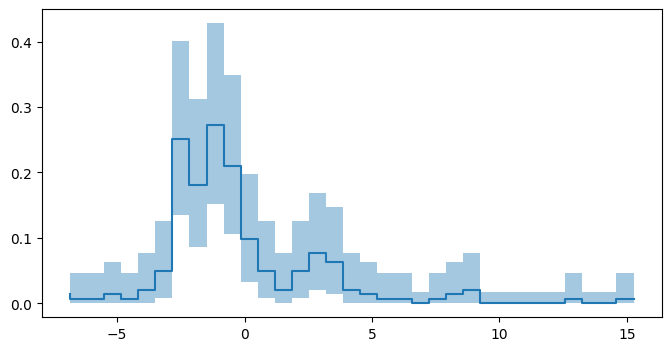

In [10]:
alpha = 0.05

f, bins = np.histogram(X, bins=m, density=True)

z_a = stats.norm.ppf(1 - alpha / (2 * m))
c = z_a / 2 * np.sqrt(m / n)

u = (np.sqrt(f) + c) ** 2
l = np.array([max(np.sqrt(f_) - c, 0) for f_ in f]) ** 2

x_values = bins[:-1]
x_values = x_values * (b - a) + a
f, l, u = f / (b - a), l / (b - a), u / (b - a)

plt.figure(figsize=(8, 4))
plt.plot(x_values, f, drawstyle="steps")
plt.fill_between(x_values, l, u, step="pre", alpha=0.4)
plt.show()

- Ядерная оценка

In [11]:
X = pd.read_csv('glass.dat', sep='\s+')['RI'].values

In [12]:
K = lambda x: stats.norm.pdf(x, 0, 1)

def compute_risk(h):
    x = X.reshape(-1,1)
    diff = x.T - x
    
    K2 = lambda x: stats.norm.pdf(x, 0, np.sqrt(2))
    return (np.sum(K2(diff / h)) - 2 * np.sum(K(diff / h))) / (h * n**2) + 2 * K(0) / (n * h)

In [13]:
hs = np.linspace(0.05, 2., 200)

h = hs[np.argmin([compute_risk(h) for h in hs])]
h

0.24597989949748744

In [14]:
def compute_f(x_values, h):
    return np.array([
        K((x - X) / h).sum() 
        for x in x_values
    ]) / (n * h)

In [15]:
def se2(x: float, h: float):
    Yx = np.array([K((x - X_i) / h) for X_i in X]) / h
    Ymx = Yx.mean()
    return np.sum((Yx - Ymx) ** 2) / (n - 1)

def compute_se(x_values, h):
    return np.array([np.sqrt(se2(x, h) / n) for x in x_values])

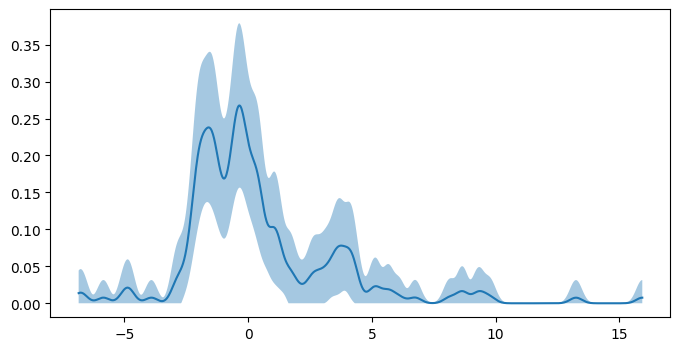

In [16]:
x_values = np.linspace(X.min(), X.max(), 1000)

alpha = 0.05
m = (X.max() - X.min()) / (3 * h)
q = stats.norm.ppf((1 + (1 - alpha) ** (1 / m)) / 2)

f = compute_f(x_values, h)
se = compute_se(x_values, h)

l = np.maximum(f - q * se, 0)
u = f + q * se

plt.figure(figsize=(8, 4))
plt.plot(x_values, f)
plt.fill_between(x_values, l, u, alpha=0.4)
plt.show()

<a name='task12'></a>
## Task 12 (4)<sup>[toc](#_toc)</sup>

По данным из предыдущей задачи, используя в качестве выходной переменной $y$ значения преломления для разных типов стекла, а в качестве входной переменной $x$ --- данные о содержании алюминия (четвертая переменная в матрице данных), восстановить зависимость между $y$ и $x$ с помощью ядерной непараметрической регрессии. Оценку ядра проводить с помощью перекрестной проверки. Построить 95\%-ые доверительные интервалы для полученной оценки функции регрессии.


In [17]:
data = pd.read_csv('glass.dat', sep='\s+')

X = data['Al'].values
Y = data['RI'].values

X.shape, Y.shape

((214,), (214,))

In [18]:
K = lambda x: stats.norm.pdf(x, 0, 1)

def nw_predict(X, Y, h):
    K_X = (X[:, None] - X[None, :]) / h
    k = K(K_X)
    predictions = np.sum(k * Y[None, :], axis=1) / np.sum(k, axis=1)
    return predictions
    
def nw_regression_estimated_risk(X, Y, bandwidth):
    h = bandwidth

    Y_pred = nw_predict(X, Y, h)
    
    k = K((X.reshape((-1, 1)) - X.reshape((1, -1))) / h)
    K_sums = np.sum(k, axis=1)
    
    J = np.sum((((Y - Y_pred) * K_sums) / (K_sums - K(0)))**2)
    return J

h = 0.13346938775510203


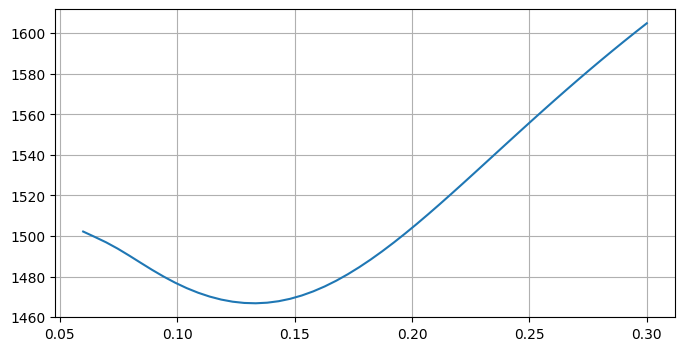

In [19]:
hs = np.linspace(0.06, 0.3, 50)

estimated_risks = []
for h in hs:
    K = lambda x: stats.norm.pdf(x, 0, 1)
    risk = nw_regression_estimated_risk(X, Y, h)
    estimated_risks.append(risk)

h = hs[np.argmin(estimated_risks)]
print(f'h = {h:}')

plt.figure(figsize=(8, 4))
plt.plot(hs, estimated_risks)
plt.grid();

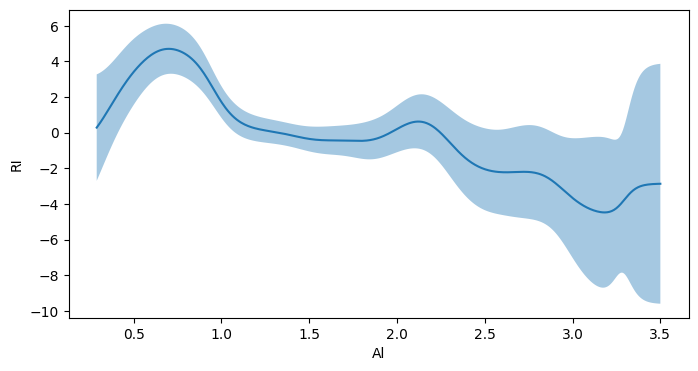

In [20]:
x_values = np.linspace(np.min(X), np.max(X), 500)

alpha = 0.05
m = (Y.max() - Y.min()) / (3 * h)
q = stats.norm.ppf((1 + (1 - alpha)**(1 / m)) / 2)

sigma = np.sqrt(np.sum((Y[1:] - Y[:-1])**2) / (2 * (n - 1)))
k = K((x_values[:, None] - X[None, :]) / h)
W = k / k.sum(axis=1)[:, None]
se = sigma * np.sqrt(np.sum(W ** 2, axis=1))
se.shape

Y_pred = np.sum(W * Y[None, :], axis=1)
l = Y_pred - q * se
u = Y_pred + q * se

plt.figure(figsize=(8, 4))
plt.xlabel('Al')
plt.ylabel('RI')

plt.plot(x_values, Y_pred)
plt.fill_between(x_values, l, u, alpha=0.4)
plt.show()